### Order in which code is to be ran

Dataset_preprocessing.ipynb --->  EDA.ipynb ---> Feature_Engineering.ipynb ---> models.ipynb ----> models.ipynb ----> neural-network.ipynb

Many Dataset files will be created in running this code could'nt submit those file of 50 mb zip file limit

### Summary


This code performs feature engineering on a dataset by first loading it and identifying numeric columns, separating the target variable (Study Recruitment Rate). It uses a RandomForestRegressor to determine feature importance, visualizing and ranking features based on their predictive contribution. Numeric features are standardized using StandardScaler, and missing values are filled with column means. Interaction features are created by multiplying pairs of numeric columns, and polynomial features of degree 2 are generated to capture non-linear relationships. The code then cleans the data by converting and removing date columns and dropping non-numeric columns. Using SelectKBest, it selects the top 37 features based on correlation with the target. Finally, the data is split into training, validation, and test sets, which are saved for further analysis. This process optimizes the dataset for machine learning by scaling, expanding feature space, and selecting relevant features.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
file_path = 'preprocessed-dataset\\full.csv'
df = pd.read_csv(file_path)


In [4]:
csv_file_path = 'Featured_engg_dataset/initial.csv'
df.to_csv(csv_file_path, index=False)

In [5]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20676 entries, 0 to 20675
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Enrollment                            20676 non-null  int64  
 1   Start Date                            20676 non-null  object 
 2   Completion Date                       20675 non-null  object 
 3   First Posted                          20676 non-null  object 
 4   Results First Posted                  7674 non-null   object 
 5   Last Update Posted                    20676 non-null  object 
 6   Study Status_COMPLETED                20676 non-null  int64  
 7   Study Status_ENROLLING_BY_INVITATION  20676 non-null  int64  
 8   Study Status_NOT_YET_RECRUITING       20676 non-null  int64  
 9   Study Status_RECRUITING               20676 non-null  int64  
 10  Study Status_SUSPENDED                20676 non-null  int64  
 11  Study Status_TE

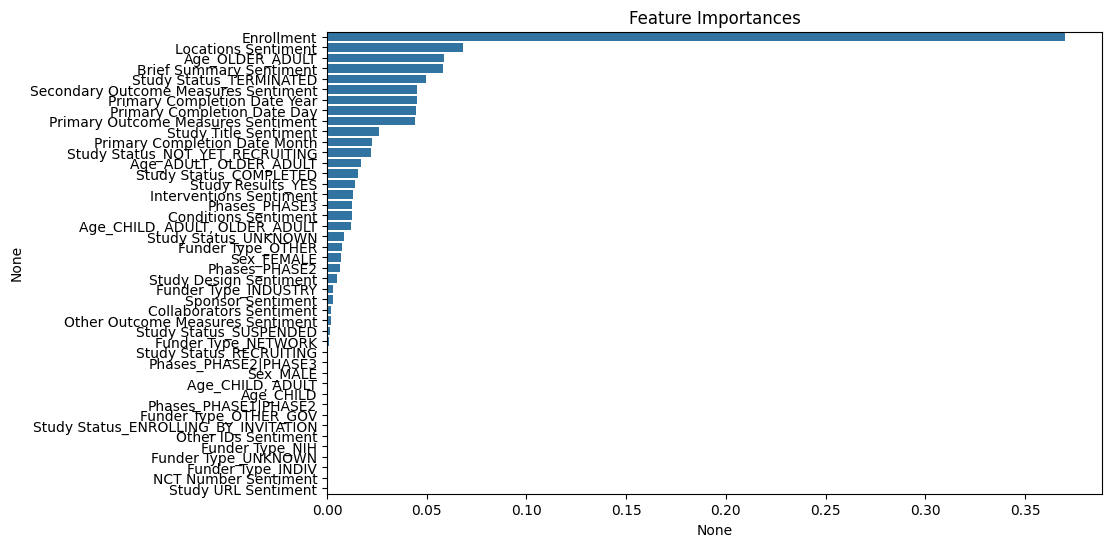

In [7]:
X = df[numeric_columns].drop('Study Recruitment Rate', axis=1)
y = df['Study Recruitment Rate']

model = RandomForestRegressor()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()



The feature importance plot ranks the significance of various features in predicting an outcome. Enrollment is the most influential feature, followed by Locations Sentiment and Age_OLDER_ADULT. These features contribute the most to the model's predictions, while others like Study URL Sentiment and NCT Number Sentiment have minimal impact. This helps identify which variables are key drivers in the analysis.

In [8]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
Enrollment                              3.700608e-01
Locations Sentiment                     6.793207e-02
Age_OLDER_ADULT                         5.876674e-02
Brief Summary Sentiment                 5.791624e-02
Study Status_TERMINATED                 4.945541e-02
Secondary Outcome Measures Sentiment    4.530312e-02
Primary Completion Date Year            4.500952e-02
Primary Completion Date Day             4.470302e-02
Primary Outcome Measures Sentiment      4.402635e-02
Study Title Sentiment                   2.601514e-02
Primary Completion Date Month           2.239954e-02
Study Status_NOT_YET_RECRUITING         2.195087e-02
Age_ADULT, OLDER_ADULT                  1.693214e-02
Study Status_COMPLETED                  1.540385e-02
Study Results_YES                       1.397221e-02
Interventions Sentiment                 1.301028e-02
Phases_PHASE3                           1.265588e-02
Conditions Sentiment                    1.253974e-02
Age_CHILD, ADULT, OLDER_

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

In [10]:
numeric_columns

Index(['Enrollment', 'Study Status_COMPLETED',
       'Study Status_ENROLLING_BY_INVITATION',
       'Study Status_NOT_YET_RECRUITING', 'Study Status_RECRUITING',
       'Study Status_SUSPENDED', 'Study Status_TERMINATED',
       'Study Status_UNKNOWN', 'Study Results_YES', 'Sex_FEMALE', 'Sex_MALE',
       'Age_ADULT, OLDER_ADULT', 'Age_CHILD', 'Age_CHILD, ADULT',
       'Age_CHILD, ADULT, OLDER_ADULT', 'Age_OLDER_ADULT',
       'Phases_PHASE1|PHASE2', 'Phases_PHASE2', 'Phases_PHASE2|PHASE3',
       'Phases_PHASE3', 'Funder Type_INDIV', 'Funder Type_INDUSTRY',
       'Funder Type_NETWORK', 'Funder Type_NIH', 'Funder Type_OTHER',
       'Funder Type_OTHER_GOV', 'Funder Type_UNKNOWN', 'NCT Number Sentiment',
       'Study Title Sentiment', 'Study URL Sentiment',
       'Brief Summary Sentiment', 'Conditions Sentiment',
       'Interventions Sentiment', 'Primary Outcome Measures Sentiment',
       'Secondary Outcome Measures Sentiment',
       'Other Outcome Measures Sentiment', 'Sponsor 

In [11]:
df

,Enrollment,Start Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Study Status_COMPLETED,Study Status_ENROLLING_BY_INVITATION,Study Status_NOT_YET_RECRUITING,Study Status_RECRUITING,...,Other Outcome Measures Sentiment,Sponsor Sentiment,Collaborators Sentiment,Study Design Sentiment,Other IDs Sentiment,Locations Sentiment,Primary Completion Date Year,Primary Completion Date Month,Primary Completion Date Day,Study Recruitment Rate
0,7,2014-05-12,2015-06-02,2009-05-13,NaN,2022-04-05,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,-0.100000,2015,6,2,0.551598
1,44,2014-02-20,2015-10-17,2010-04-30,2024-05-20,2024-05-20,1,0,0,0,...,0.125,-0.035714,0.0,0.0,0.0,0.018182,2015,6,27,0.443157
2,46,2014-03-03,2017-05-09,2011-02-02,NaN,2017-05-16,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,0.166667,2017,5,9,0.044558
3,56,2018-07-21,2018-11-15,2011-04-18,NaN,2018-12-13,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,0.000000,2018,11,1,7.279202
4,851,2014-04-24,2016-11-18,2011-06-20,2018-04-23,2018-04-23,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,0.000000,2016,11,18,1.969008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,108,2021-05-17,2022-07-18,2021-05-12,NaN,2023-04-26,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,0.000000,2022,7,18,7.693208
20672,66,2015-08-04,2019-07-12,2015-05-25,NaN,2019-08-29,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,-0.025253,2019,7,12,0.199434
20673,261,2018-08-30,2020-09-07,2019-02-22,NaN,2021-05-11,1,0,0,0,...,0.000,0.000000,0.0,0.0,0.0,-0.040000,2020,5,12,1.074256
20674,12,2014-01-14,2015-10-13,2013-11-11,2021-03-26,2021-03-26,0,0,0,0,...,0.000,0.000000,0.0,0.4,0.0,-0.015909,2015,9,1,0.044077


In [12]:
if 'Study Recruitment Rate' in numeric_columns:
    numeric_columns = numeric_columns.tolist()  
    numeric_columns.remove('Study Recruitment Rate') 
    numeric_columns = pd.Index(numeric_columns)  


In [13]:
numeric_columns

Index(['Enrollment', 'Study Status_COMPLETED',
       'Study Status_ENROLLING_BY_INVITATION',
       'Study Status_NOT_YET_RECRUITING', 'Study Status_RECRUITING',
       'Study Status_SUSPENDED', 'Study Status_TERMINATED',
       'Study Status_UNKNOWN', 'Study Results_YES', 'Sex_FEMALE', 'Sex_MALE',
       'Age_ADULT, OLDER_ADULT', 'Age_CHILD', 'Age_CHILD, ADULT',
       'Age_CHILD, ADULT, OLDER_ADULT', 'Age_OLDER_ADULT',
       'Phases_PHASE1|PHASE2', 'Phases_PHASE2', 'Phases_PHASE2|PHASE3',
       'Phases_PHASE3', 'Funder Type_INDIV', 'Funder Type_INDUSTRY',
       'Funder Type_NETWORK', 'Funder Type_NIH', 'Funder Type_OTHER',
       'Funder Type_OTHER_GOV', 'Funder Type_UNKNOWN', 'NCT Number Sentiment',
       'Study Title Sentiment', 'Study URL Sentiment',
       'Brief Summary Sentiment', 'Conditions Sentiment',
       'Interventions Sentiment', 'Primary Outcome Measures Sentiment',
       'Secondary Outcome Measures Sentiment',
       'Other Outcome Measures Sentiment', 'Sponsor 

In [14]:
numeric_data = df[numeric_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

This code standardizes numerical data from a DataFrame using StandardScaler. It extracts the numerical columns, then fits and transforms them so each feature has a mean of 0 and a standard deviation of 1. The result is a new DataFrame with scaled values, which is useful for machine learning models sensitive to feature scaling.

In [15]:
scaled_df['Study Recruitment Rate'] = df['Study Recruitment Rate'].values
final_df = pd.concat([scaled_df, df[non_numeric_columns]], axis=1)


In [16]:
final_df.to_csv('Featured_engg_dataset/scaled_data.csv', index=False)
print("Scaled data with non-numeric columns saved to Featured_engg_dataset/scaled_data.csv.")
scaled_df=final_df

Scaled data with non-numeric columns saved to Featured_engg_dataset/scaled_data.csv.


In [17]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20676 entries, 0 to 20675
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Enrollment                            20676 non-null  float64
 1   Study Status_COMPLETED                20676 non-null  float64
 2   Study Status_ENROLLING_BY_INVITATION  20676 non-null  float64
 3   Study Status_NOT_YET_RECRUITING       20676 non-null  float64
 4   Study Status_RECRUITING               20676 non-null  float64
 5   Study Status_SUSPENDED                20676 non-null  float64
 6   Study Status_TERMINATED               20676 non-null  float64
 7   Study Status_UNKNOWN                  20676 non-null  float64
 8   Study Results_YES                     20676 non-null  float64
 9   Sex_FEMALE                            20676 non-null  float64
 10  Sex_MALE                              20676 non-null  float64
 11  Age_ADULT, OLDE

In [18]:
non_numeric_columns = scaled_df.columns[scaled_df.apply(pd.to_numeric, errors='coerce').isnull().any()]
print(non_numeric_columns)

Index(['Start Date', 'Completion Date', 'First Posted', 'Results First Posted',
       'Last Update Posted'],
      dtype='object')


In [19]:
numeric_columns = scaled_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaled_df[numeric_columns] = scaled_df[numeric_columns].apply(lambda col: col.fillna(col.mean()))

In [20]:
print("\nCreating interaction features...")
interaction_features = pd.DataFrame()

for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        interaction_features[f'{numeric_columns[i]}_x_{numeric_columns[j]}'] = scaled_df[numeric_columns[i]] * scaled_df[numeric_columns[j]]

interaction_df = pd.concat([scaled_df, interaction_features, df[non_numeric_columns]], axis=1)
print("Interaction features created.")


Creating interaction features...
Interaction features created.


In [21]:
interaction_features

,Enrollment_x_Study Status_COMPLETED,Enrollment_x_Study Status_ENROLLING_BY_INVITATION,Enrollment_x_Study Status_NOT_YET_RECRUITING,Enrollment_x_Study Status_RECRUITING,Enrollment_x_Study Status_SUSPENDED,Enrollment_x_Study Status_TERMINATED,Enrollment_x_Study Status_UNKNOWN,Enrollment_x_Study Results_YES,Enrollment_x_Sex_FEMALE,Enrollment_x_Sex_MALE,...,Locations Sentiment_x_Primary Completion Date Year,Locations Sentiment_x_Primary Completion Date Month,Locations Sentiment_x_Primary Completion Date Day,Locations Sentiment_x_Study Recruitment Rate,Primary Completion Date Year_x_Primary Completion Date Month,Primary Completion Date Year_x_Primary Completion Date Day,Primary Completion Date Year_x_Study Recruitment Rate,Primary Completion Date Month_x_Primary Completion Date Day,Primary Completion Date Month_x_Study Recruitment Rate,Primary Completion Date Day_x_Study Recruitment Rate
0,-0.035214,0.001490,0.001907,0.006070,0.002108,0.027717,0.015371,0.049625,0.014081,0.018733,...,3.088217,0.239556,2.056309,-0.727229,0.425615,3.653409,-1.292056,0.283398,-0.100226,-0.860323
1,-0.029507,0.001249,0.001598,0.005086,0.001766,0.023225,0.012879,-0.070452,0.011799,0.015697,...,-0.126195,-0.009789,0.058609,0.023875,0.425615,-2.548225,-1.038045,-0.197668,-0.080522,0.482099
2,-0.029198,0.001236,0.001581,0.005033,0.001748,0.022982,0.012745,0.041147,0.011676,0.015533,...,-2.609849,-0.834379,-1.455088,0.079225,0.688819,1.201243,-0.065404,0.384042,-0.020910,-0.036465
3,-0.027656,0.001170,0.001497,0.004767,0.001656,0.021768,0.012072,0.038974,0.011059,0.014712,...,0.162051,-0.197526,0.261907,-1.144620,-1.294558,1.716505,-7.501688,-2.092262,9.143868,-12.124216
4,0.094974,-0.004019,-0.005143,-0.016372,-0.005686,-0.074755,-0.041455,0.226765,-0.037978,-0.050523,...,0.299570,-0.197526,-0.021189,-0.309617,-2.393134,-0.256714,-3.751185,0.169268,2.473396,0.265324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,-0.019635,0.000831,0.001063,0.003385,0.001175,0.015455,0.008570,0.027670,0.007852,0.010445,...,-0.112986,-0.016648,-0.021189,-1.209721,0.076072,0.096822,5.527830,0.014266,0.814494,1.036659
20672,-0.026113,0.001105,0.001414,0.004501,0.001563,0.020554,0.011398,0.036800,0.010442,0.013891,...,0.267258,-0.047692,0.225534,-0.089838,-0.062813,0.297040,-0.118322,-0.053006,0.021114,-0.099850
20673,0.003966,-0.000168,-0.000215,-0.000684,-0.000237,-0.003121,-0.001731,-0.005589,-0.001586,-0.002110,...,0.096996,0.291752,0.311269,-0.667875,0.073214,0.078112,-0.167600,0.234950,-0.504120,-0.537844
20674,0.115893,0.001458,0.001865,0.005937,0.002062,-0.147239,0.015034,-0.082238,0.013773,0.018322,...,0.801039,-0.232891,0.569593,-0.015073,-1.595208,3.901474,-0.103245,-1.134301,0.030017,-0.073414


In [22]:
interaction_df.to_csv('Featured_engg_dataset/interaction_df.csv', index=False)
print("Interaction features saved to Featured_engg_dataset/interaction_df.csv.")

Interaction features saved to Featured_engg_dataset/interaction_df.csv.



This code creates interaction features between numerical columns in a DataFrame. It initializes an empty DataFrame for interaction features, then iterates over pairs of numerical columns, multiplying each pair to create new features. These interaction features are added to the original scaled numerical data and non-numeric columns, resulting in an expanded DataFrame that includes both original and interaction features. This process can enhance model performance by capturing relationships between variables.

In [23]:
print("\nCreating polynomial features...")
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(interaction_df[numeric_columns])
poly_feature_names = poly.get_feature_names_out(input_features=numeric_columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
poly_interaction = pd.concat([interaction_df, poly_df], axis=1)
print("Polynomial features created.")



Creating polynomial features...
Polynomial features created.


In [24]:
poly_df.to_csv('Featured_engg_dataset/poly_df.csv', index=False)
print("Polynomial features saved to poly_df.csv.")

poly_interaction.to_csv('Featured_engg_dataset/poly_interaction.csv', index=False)
print("new features saved to poly_interaction.csv.")


Polynomial features saved to poly_df.csv.
new features saved to poly_interaction.csv.


In [25]:
poly_interaction

,Enrollment,Study Status_COMPLETED,Study Status_ENROLLING_BY_INVITATION,Study Status_NOT_YET_RECRUITING,Study Status_RECRUITING,Study Status_SUSPENDED,Study Status_TERMINATED,Study Status_UNKNOWN,Study Results_YES,Sex_FEMALE,...,Primary Completion Date Year^2,Primary Completion Date Year Primary Completion Date Month,Primary Completion Date Year Primary Completion Date Day,Primary Completion Date Year Study Recruitment Rate,Primary Completion Date Month^2,Primary Completion Date Month Primary Completion Date Day,Primary Completion Date Month Study Recruitment Rate,Primary Completion Date Day^2,Primary Completion Date Day Study Recruitment Rate,Study Recruitment Rate^2
0,-0.064595,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,-0.768256,-0.217997,...,5.486783,0.425615,3.653409,-1.292056,0.033015,0.283398,-0.100226,2.432645,-0.860323,0.304260
1,-0.054126,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,1.301650,-0.217997,...,5.486783,0.425615,-2.548225,-1.038045,0.033015,-0.197668,-0.080522,1.183471,0.482099,0.196388
2,-0.053560,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,-0.768256,-0.217997,...,2.154552,0.688819,1.201243,-0.065404,0.220218,0.384042,-0.020910,0.669737,-0.036465,0.001985
3,-0.050730,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,-0.768256,-0.217997,...,1.062063,-1.294558,1.716505,-7.501688,1.577947,-2.092262,9.143868,2.774213,-12.124216,52.986786
4,0.174214,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,1.301650,-0.217997,...,3.629458,-2.393134,-0.256714,-3.751185,1.577947,0.169268,2.473396,0.018158,0.265324,3.876994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20671,-0.036017,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,-0.768256,-0.217997,...,0.516291,0.076072,0.096822,5.527830,0.011209,0.014266,0.814494,0.018158,1.036659,59.185456
20672,-0.047901,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,-0.768256,-0.217997,...,0.351993,-0.062813,0.297040,-0.118322,0.011209,-0.053006,0.021114,0.250667,-0.099850,0.039774
20673,0.007274,0.545156,-0.023072,-0.029518,-0.093976,-0.032637,-0.429097,-0.237956,-0.768256,-0.217997,...,0.024341,0.073214,0.078112,-0.167600,0.220218,0.234950,-0.504120,0.250667,-0.537844,1.154025
20674,-0.063180,-1.834336,-0.023072,-0.029518,-0.093976,-0.032637,2.330473,-0.237956,1.301650,-0.217997,...,5.486783,-1.595208,3.901474,-0.103245,0.463785,-1.134301,0.030017,2.774213,-0.073414,0.001943


In [26]:
poly_interaction['output'] = poly_interaction['Study Recruitment Rate'].mean(axis=1)

poly_interaction['output']
poly_interaction = poly_interaction.drop('Study Recruitment Rate', axis=1)



In [27]:
poly_interaction['output']

0        0.551598
1        0.443157
2        0.044558
3        7.279202
4        1.969008
           ...   
20671    7.693208
20672    0.199434
20673    1.074256
20674    0.044077
20675    0.133504
Name: output, Length: 20676, dtype: float64

In [28]:
poly_interaction = poly_interaction.rename(columns={'output': 'Study Recruitment Rate'})

print("Updated DataFrame with renamed column:")



Updated DataFrame with renamed column:


In [29]:
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: []


In [30]:
X = poly_interaction.drop('Study Recruitment Rate', axis=1)
y = poly_interaction['Study Recruitment Rate']

In [31]:
date_columns = ['Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted']


In [32]:
print("Date columns converted to datetime.")


Date columns converted to datetime.


In [33]:
X = X.drop(columns=date_columns)


In [34]:
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns after date processing:", non_numeric_columns)

Non-numeric columns after date processing: ['Start Date', 'Start Date']


In [35]:
if non_numeric_columns:
    X = X.drop(columns=non_numeric_columns)
    print(f"Dropped non-numeric columns: {non_numeric_columns}")

Dropped non-numeric columns: ['Start Date', 'Start Date']


In [36]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [37]:
print("Data types of features after processing:")
print(X.dtypes)

Data types of features after processing:
Enrollment                                                   float64
Study Status_COMPLETED                                       float64
Study Status_ENROLLING_BY_INVITATION                         float64
Study Status_NOT_YET_RECRUITING                              float64
Study Status_RECRUITING                                      float64
                                                              ...   
Primary Completion Date Month Primary Completion Date Day    float64
Primary Completion Date Month Study Recruitment Rate         float64
Primary Completion Date Day^2                                float64
Primary Completion Date Day Study Recruitment Rate           float64
Study Recruitment Rate^2                                     float64
Length: 2113, dtype: object


This code uses SelectKBest with the f_regression scoring function to select the top 37 features from the dataset X based on their correlation with the target variable y. It fits the selector to the data, transforms X to retain only the selected features, and stores the names of these features in selected_features.

In [38]:
selector = SelectKBest(score_func=f_regression, k=37)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


In [39]:
final = pd.concat([X[selected_features], y], axis=1)
print("Important features selected.")

print("\nFeature engineering completed.")


Important features selected.

Feature engineering completed.


In [40]:
final_train, final_temp = train_test_split(final, test_size=0.4, random_state=42)
final_val, final_test = train_test_split(final_temp, test_size=0.5, random_state=42)


In [41]:
final_train.to_csv('Featured_engg_dataset/train.csv', index=False)
final_val.to_csv('Featured_engg_dataset/val.csv', index=False)
final_test.to_csv('Featured_engg_dataset/test.csv', index=False)